## **STATISTICAL ANALYSIS OF POPULATION OF AFRICAN WOMEN WITH CANCER** 
This research aimed to provide further insight into the dynamics of cancer prevalence among African women especially between 2014 and 2018. In order to meet the project’s objectives, the respective data were cleaned to remove extraneous features and then merged into a single file for ease of computation and presentation. Working with Python programming language we were able to compute the Mortality-to-Incidence Ratio (MIR) as well as the 5-year Relative Survival (RS) rate for each country. Ten cancer-causing factors were selected and a hypothesis was tested to see if indeed there was any relationship between cancer incidence and these variables. To do this, a multiple linear regression model was built. Result gave sufficient evidence to reject the null hypothesis. The variables which showed least correlation with the target variable were dropped in other to achieve a better multiple linear model which we called the Fine Model. Other methods of handling least correlated variables like the Ridge Regression and Least Absolute Shrinkage and Selection Operator (LASSO) Regression were employed. Using machine learning algorithms, we tested the Root Mean Square Error (RMSE) and the coefficient of determination (R2) of the initial model and compared it with that of the other models. The Ridge Regression performed best with an RMSE of 0.089 and R2 of 0.893.  To conclude, we obtained the regression parameters for all our models and make predictions with the best model.


We begin by importing relevant libraries

In [216]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

For better visualization outputs, we employ the following settings

In [217]:
mpl.rc('axes', labelsize = 14)
mpl.rc('xtick', labelsize = 12)
mpl.rc('ytick', labelsize = 12)

We proceed to import our data from the different sources

df1 = Cancer Causing Factors

df2 = African Women Cancer Mortality 

df3 = African Women Cancer Incidence

In [218]:
df1 = pd.read_excel(r'C:\Users\DELL\Downloads\Cancer-Atlas-3rd-ed_Map-data-download.xlsx', na_values = 'No data')

In [219]:
df2 = pd.read_excel(r'C:\Users\DELL\Downloads\African Women Cancer Mortality.xlsx', na_values = '-')
df3 = pd.read_excel(r'C:\Users\DELL\Downloads\African Women Cancer Incidence.xlsx', na_values = '-')

### Working with the Cancer Causing Factors Data
Cleaning df1

In [220]:
df1.head(2)

,Downloaded from: www.canceratlas.cancer.org. Please refer to source information below table.,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36,Unnamed: 37,Unnamed: 38,Unnamed: 39,Unnamed: 40,Unnamed: 41,Unnamed: 42
0,Country or Territory,ISO 3 code,Cancer deaths attributable to alcohol\nProport...,Cancer deaths attributable to alcohol\nProport...,Smoking prevalence male\nPrevalence (%) of dai...,Smoking prevalence female\nPrevalence (%) of d...,Cancers attributable to infections\nProportion...,Obesity prevalence male\nInternational variati...,Obesity prevalence female\nInternational varia...,Melanoma skin cancer incidence\nAge-standardiz...,...,"Cervical cancer screening, HPV DNA testing\n2017",Radiotherapy availability\nNumber of radiother...,Untreated deaths in pain\n2016,Population-based cancer registries\nAvailabili...,Mortality registration quality\nQuality of mor...,Cost of smoking-attributable diseases (US$ bil...,Cervical cancer incidence rates\nAge-standardi...,"HIV prevalence (%)\nBoth sexes, 2017",UICC organizations\nA global network of cancer...,Global Relay For Life\n2017
1,Afghanistan,AFG,0.1,0.5,21.4,7,16,3.2,7.6,0.3,...,None,0,5785.1,PBCR,No coverage,Data not featured,6.6,NaN,2,Non-participant


Renaming the column labels

In [221]:
df1_dict = {'Downloaded from: www.canceratlas.cancer.org. Please refer to source information below table.': 'Country', 'Unnamed: 2': 'Alcohol', 'Unnamed: 5': 'Smoking', 'Unnamed: 8' : 'Obesity', 'Unnamed: 10': 'Breastfeeding', 'Unnamed: 12': 'Outdoor Air Pollution', 'Unnamed: 13': 'Indoor Air Pollution', 'Unnamed: 26': 'Survivors', 'Unnamed: 31': 'Hepatitis B Vaccination'}

In [222]:
df1 = df1.rename(columns = df1_dict)
df1.head(2)

,Country,Unnamed: 1,Alcohol,Unnamed: 3,Unnamed: 4,Smoking,Unnamed: 6,Unnamed: 7,Obesity,Unnamed: 9,...,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36,Unnamed: 37,Unnamed: 38,Unnamed: 39,Unnamed: 40,Unnamed: 41,Unnamed: 42
0,Country or Territory,ISO 3 code,Cancer deaths attributable to alcohol\nProport...,Cancer deaths attributable to alcohol\nProport...,Smoking prevalence male\nPrevalence (%) of dai...,Smoking prevalence female\nPrevalence (%) of d...,Cancers attributable to infections\nProportion...,Obesity prevalence male\nInternational variati...,Obesity prevalence female\nInternational varia...,Melanoma skin cancer incidence\nAge-standardiz...,...,"Cervical cancer screening, HPV DNA testing\n2017",Radiotherapy availability\nNumber of radiother...,Untreated deaths in pain\n2016,Population-based cancer registries\nAvailabili...,Mortality registration quality\nQuality of mor...,Cost of smoking-attributable diseases (US$ bil...,Cervical cancer incidence rates\nAge-standardi...,"HIV prevalence (%)\nBoth sexes, 2017",UICC organizations\nA global network of cancer...,Global Relay For Life\n2017
1,Afghanistan,AFG,0.1,0.5,21.4,7,16,3.2,7.6,0.3,...,None,0,5785.1,PBCR,No coverage,Data not featured,6.6,NaN,2,Non-participant


Viewing column names for easy dropping off of irrelevant features

In [223]:
df1.columns

Index(['Country', 'Unnamed: 1', 'Alcohol', 'Unnamed: 3', 'Unnamed: 4',
       'Smoking', 'Unnamed: 6', 'Unnamed: 7', 'Obesity', 'Unnamed: 9',
       'Breastfeeding', 'Unnamed: 11', 'Outdoor Air Pollution',
       'Indoor Air Pollution', 'Unnamed: 14', 'Unnamed: 15', 'Unnamed: 16',
       'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19', 'Unnamed: 20',
       'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23', 'Unnamed: 24',
       'Unnamed: 25', 'Survivors', 'Unnamed: 27', 'Unnamed: 28', 'Unnamed: 29',
       'Unnamed: 30', 'Hepatitis B Vaccination', 'Unnamed: 32', 'Unnamed: 33',
       'Unnamed: 34', 'Unnamed: 35', 'Unnamed: 36', 'Unnamed: 37',
       'Unnamed: 38', 'Unnamed: 39', 'Unnamed: 40', 'Unnamed: 41',
       'Unnamed: 42'],
      dtype='object')

In [224]:
to_drop = ['Unnamed: 1', 'Unnamed: 3', 'Unnamed: 4', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 9', 'Unnamed: 11', 'Unnamed: 14', 'Unnamed: 15', 'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19', 'Unnamed: 20',
       'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23', 'Unnamed: 24',
       'Unnamed: 25', 'Unnamed: 27', 'Unnamed: 28',
       'Unnamed: 29', 'Unnamed: 30', 'Hepatitis B Vaccination', 'Unnamed: 32',
       'Unnamed: 33', 'Unnamed: 34', 'Unnamed: 35', 'Unnamed: 36',
       'Unnamed: 37', 'Unnamed: 38', 'Unnamed: 39', 'Unnamed: 40',
       'Unnamed: 41', 'Unnamed: 42']

In [225]:
df1.drop(to_drop, inplace = True, axis = 1)

In [226]:
df1.head(2)

,Country,Alcohol,Smoking,Obesity,Breastfeeding,Outdoor Air Pollution,Indoor Air Pollution,Survivors
0,Country or Territory,Cancer deaths attributable to alcohol\nProport...,Smoking prevalence female\nPrevalence (%) of d...,Obesity prevalence female\nInternational varia...,Breastfeeding at 12 months\nPercent (%) of chi...,Outdoor air pollution\nAverage annual populati...,Indoor air pollution\nProportion (%) of popula...,Cancer survivors\nEstimated number of cancer s...
1,Afghanistan,0.1,7,7.6,88,57,71,151


Dropping the first row since it is only a repition of the column labels

In [227]:
df1.drop(0, axis = 0, inplace = True)

In [228]:
df1.head(5)

,Country,Alcohol,Smoking,Obesity,Breastfeeding,Outdoor Air Pollution,Indoor Air Pollution,Survivors
1,Afghanistan,0.1,7,7.6,88,57,71,151
2,Albania,2.4,6.1,21.8,72.3,18,35,401.1
3,Algeria,0.2,2.2,34.9,55.1,39,0.32,312.6
4,Andorra,NaN,19.8,25.3,NaN,10,0.63,NaN
5,Angola,2.4,1.6,12.1,92.6,32,56,190.2


Checking for the columns with missing values

In [229]:
df1_incomplete = df1[df1.isnull().any(axis = 1)].head(40)
df1_incomplete

,Country,Alcohol,Smoking,Obesity,Breastfeeding,Outdoor Air Pollution,Indoor Air Pollution,Survivors
4,Andorra,NaN,19.8,25.3,NaN,10,0.63,NaN
6,Antigua and Barbuda,2.4,2.2,25.9,NaN,19,1.8,NaN
12,Bahamas,1.8,3.7,38.1,NaN,17,2.9,462.5
15,Barbados,2.2,0.7,31.3,NaN,23,0.063,607.9
17,Belgium,4.2,16.4,21,NaN,13,0.35,1076
22,Bosnia and Herzegovina,2.7,22.6,18.4,NaN,28,40,479.2
25,Brunei Darussalam,0.8,1.8,15.7,NaN,5.9,0.2,572.2
26,Bulgaria,3.4,17.5,24.3,NaN,19,16,591.8
40,Cook Islands,NaN,16.4,59.2,NaN,NaN,NaN,NaN
43,Croatia,3,23.4,24.5,NaN,18,11,769.8


Dropping all missing values

In [230]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 210 entries, 1 to 210
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Country                209 non-null    object
 1   Alcohol                183 non-null    object
 2   Smoking                191 non-null    object
 3   Obesity                191 non-null    object
 4   Breastfeeding          155 non-null    object
 5   Outdoor Air Pollution  191 non-null    object
 6   Indoor Air Pollution   191 non-null    object
 7   Survivors              186 non-null    object
dtypes: object(8)
memory usage: 14.8+ KB


In [231]:
df1 = df1.drop(210, axis = 0)
df1 = df1.drop(209, axis = 0)
df1.tail(2)

,Country,Alcohol,Smoking,Obesity,Breastfeeding,Outdoor Air Pollution,Indoor Air Pollution,Survivors
207,Zambia,0.8,2.5,12.4,94.7,27,85,266.9
208,Zimbabwe,0.6,1.3,25.3,89,22,67,330.6


In [232]:
median = df1["Breastfeeding"].median()
df1["Breastfeeding"] = df1["Breastfeeding"].fillna(median)

In [233]:
median = df1["Obesity"].median()
df1["Obesity"] = df1["Obesity"].fillna(median)

In [234]:
df1_incomplete = df1[df1.isnull().any(axis = 1)].head(40)
df1_incomplete

,Country,Alcohol,Smoking,Obesity,Breastfeeding,Outdoor Air Pollution,Indoor Air Pollution,Survivors
4,Andorra,NaN,19.8,25.30,73.95,10,0.63,NaN
6,Antigua and Barbuda,2.4,2.2,25.90,73.95,19,1.8,NaN
40,Cook Islands,NaN,16.4,59.20,73.95,NaN,NaN,NaN
51,Dominica,NaN,1.2,35.60,73.95,19,8.4,NaN
64,French Guiana,NaN,NaN,22.75,73.95,NaN,NaN,703.6
65,French Polynesia,NaN,NaN,22.75,73.95,NaN,NaN,661.9
72,Greenland,NaN,NaN,22.75,73.95,12,0.64,NaN
73,Grenada,2.6,2.5,29.00,73.95,23,3.5,NaN
74,Guadeloupe,NaN,NaN,22.75,73.95,NaN,NaN,776.5
75,Guam,NaN,NaN,22.75,73.95,12,7.7,418


In [235]:
df1 = df1.dropna()
df1.head(50)

,Country,Alcohol,Smoking,Obesity,Breastfeeding,Outdoor Air Pollution,Indoor Air Pollution,Survivors
1,Afghanistan,0.1,7,7.6,88.00,57,71,151
2,Albania,2.4,6.1,21.8,72.30,18,35,401.1
3,Algeria,0.2,2.2,34.9,55.10,39,0.32,312.6
5,Angola,2.4,1.6,12.1,92.60,32,56,190.2
7,Argentina,2.7,12.6,29.0,62.00,13,2.3,587.1
8,Armenia,1.8,1.5,23.0,52.30,33,16,402.2
9,Australia,3.7,13.3,28.4,30.00,8.6,0.3,1849.8
10,Austria,3.6,15.8,18.3,16.00,12,0.87,737.9
11,Azerbaijan,1,0.3,23.6,36.10,20,15,228.1
12,Bahamas,1.8,3.7,38.1,73.95,17,2.9,462.5


In [236]:
df1_incomplete = df1[df1.isnull().any(axis = 1)].head()
df1_incomplete

,Country,Alcohol,Smoking,Obesity,Breastfeeding,Outdoor Air Pollution,Indoor Air Pollution,Survivors


Getting the general overview of our Cancer Causing Factors

In [237]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 176 entries, 1 to 208
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Country                176 non-null    object 
 1   Alcohol                176 non-null    object 
 2   Smoking                176 non-null    object 
 3   Obesity                176 non-null    float64
 4   Breastfeeding          176 non-null    float64
 5   Outdoor Air Pollution  176 non-null    object 
 6   Indoor Air Pollution   176 non-null    object 
 7   Survivors              176 non-null    object 
dtypes: float64(2), object(6)
memory usage: 12.4+ KB


In [238]:
df1.describe()

,Obesity,Breastfeeding
count,176.000000,176.000000
mean,21.530114,67.184659
std,10.130724,25.343803
min,2.600000,2.000000
25%,12.850000,49.500000
50%,21.800000,73.950000
75%,27.650000,88.025000
max,55.000000,99.400000


Observe that all our features are of object type.

Creating a new dataframe for only numerical features by dropping categorical features.

Converting the numeric features to floats

In [239]:
df1_num = df1.drop(columns = 'Country')
df1_num = pd.DataFrame(df1_num, dtype = 'float64')

In [240]:
df1_num.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 176 entries, 1 to 208
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Alcohol                176 non-null    float64
 1   Smoking                176 non-null    float64
 2   Obesity                176 non-null    float64
 3   Breastfeeding          176 non-null    float64
 4   Outdoor Air Pollution  176 non-null    float64
 5   Indoor Air Pollution   176 non-null    float64
 6   Survivors              176 non-null    float64
dtypes: float64(7)
memory usage: 11.0 KB


In [241]:
df1_num.head(2)

,Alcohol,Smoking,Obesity,Breastfeeding,Outdoor Air Pollution,Indoor Air Pollution,Survivors
1,0.1,7.0,7.6,88.0,57.0,71.0,151.0
2,2.4,6.1,21.8,72.3,18.0,35.0,401.1


Working with the categorical feature by selecting only the categorical feature from the initial dataframe, df1

In [242]:
df1_cat = df1['Country']
df1_cat = pd.DataFrame(df1_cat)

Merging the numerical and categorical features to form a new df1 dataframe

In [243]:
df1 = pd.merge(df1_cat, df1_num, right_index = True, left_index = True)
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 176 entries, 1 to 208
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Country                176 non-null    object 
 1   Alcohol                176 non-null    float64
 2   Smoking                176 non-null    float64
 3   Obesity                176 non-null    float64
 4   Breastfeeding          176 non-null    float64
 5   Outdoor Air Pollution  176 non-null    float64
 6   Indoor Air Pollution   176 non-null    float64
 7   Survivors              176 non-null    float64
dtypes: float64(7), object(1)
memory usage: 17.4+ KB


Checking to see we are on track

In [244]:
df1.head(2)

,Country,Alcohol,Smoking,Obesity,Breastfeeding,Outdoor Air Pollution,Indoor Air Pollution,Survivors
1,Afghanistan,0.1,7.0,7.6,88.0,57.0,71.0,151.0
2,Albania,2.4,6.1,21.8,72.3,18.0,35.0,401.1


Cancer Causing Factors Data is ready for use.

### Working with the African  Women Cancer Mortality Data
Cleaning df2

In [245]:
df2.head(2)

,Population,Number,Uncertainty interval,Crude Rate**,ASR (World)*,Cum. risk**
0,Africa,376956,[355835.0-399330.0],58.5,90.5,NaN
1,Nigeria,41913,[39155.4-44864.8],43.4,75.5,NaN


Renaming Population to Country to match feature in df1.

Renaming Number to Mortality for easy indentification.

Dropping Uncertainty interval, Crude Rate, ASR and Cum. risk

In [246]:
df2_dict = {'Population': 'Country', 'Number': 'Mortality'}
df2 = df2.rename(columns = df2_dict)
df2.head(2)

,Country,Mortality,Uncertainty interval,Crude Rate**,ASR (World)*,Cum. risk**
0,Africa,376956,[355835.0-399330.0],58.5,90.5,NaN
1,Nigeria,41913,[39155.4-44864.8],43.4,75.5,NaN


In [247]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55 entries, 0 to 54
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Country               55 non-null     object 
 1   Mortality             55 non-null     int64  
 2   Uncertainty interval  55 non-null     object 
 3   Crude Rate**          55 non-null     float64
 4   ASR (World)*          55 non-null     float64
 5   Cum. risk**           0 non-null      float64
dtypes: float64(3), int64(1), object(2)
memory usage: 2.7+ KB


In [248]:
df2_c = df2['Country']
df2_c = pd.DataFrame(df2_c)
df2_c.head(2)

,Country
0,Africa
1,Nigeria


In [249]:
df2_m = df2['Mortality']
df2_m = pd.DataFrame(df2_m)
df2_m.head(2)

,Mortality
0,376956
1,41913


In [250]:
df2 = pd.merge(df2_c, df2_m, right_index = True, left_index = True)
df2.head(2)

,Country,Mortality
0,Africa,376956
1,Nigeria,41913


In [251]:
df2 = df2.drop(0, axis = 0)
df2.head(2)

,Country,Mortality
1,Nigeria,41913
2,Egypt,38814


In [252]:
df2 = df2.sort_values('Country')
df2 = df2.reset_index()
df2 = df2.drop(columns = 'index')
df2.head(2)

,Country,Mortality
0,Algeria,13391
1,Angola,5923


African Women Cancer Mortality Data is ready to use

### Working with African Women Cancer Incidence Data
Cleaning df3

In [253]:
df3.head(2)

,Population,Number,Uncertainty interval,Crude Rate**,ASR (World)*,Cum. risk**
0,Africa,608616,[575657.0-643462.0],94.4,139.2,NaN
1,Nigeria,71022,[66540.1-75805.8],73.5,119.4,NaN


In [254]:
df3_dict = {'Population': 'Country', 'Number': 'Incidence'}
df3 = df3.rename(columns = df3_dict)
df3.head(2)

,Country,Incidence,Uncertainty interval,Crude Rate**,ASR (World)*,Cum. risk**
0,Africa,608616,[575657.0-643462.0],94.4,139.2,NaN
1,Nigeria,71022,[66540.1-75805.8],73.5,119.4,NaN


In [255]:
df3_c = df3['Country']
df3_c = pd.DataFrame(df3_c)

In [256]:
df3_i = df3['Incidence']
df3_i = pd.DataFrame(df3_i)

In [257]:
df3 = pd.merge(df3_c, df3_i, right_index = True, left_index = True)
df3.head(2)

,Country,Incidence
0,Africa,608616
1,Nigeria,71022


In [258]:
df3 = df3.drop(0, axis = 0)
df3 = df3.sort_values('Country')
df3 = df3.reset_index()
df3 = df3.drop(columns = 'index', axis = 1)
df3.head(2)

,Country,Incidence
0,Algeria,29112
1,Angola,9218


African Women Cancer Incidence Data is ready to use

### Working with all three data in one final dataframe
Merging dataframes

In [259]:
df = pd.merge(df2, df3, how = 'inner', on = 'Country', left_index = False, right_index = False)
df

,Country,Mortality,Incidence
0,Algeria,13391,29112
1,Angola,5923,9218
2,Benin,2930,4297
3,Botswana,527,1076
4,Burkina Faso,5795,7516
5,Burundi,3803,4914
6,Cabo Verde,217,300
7,Cameroon,6028,9335
8,Central African Republic,1226,1531
9,Chad,3338,4572


In [260]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54 entries, 0 to 53
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Country    54 non-null     object
 1   Mortality  54 non-null     int64 
 2   Incidence  54 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 1.7+ KB


In [261]:
df = pd.merge(df, df1, how = 'inner', left_index = False, right_index = False)
df.tail(60)

,Country,Mortality,Incidence,Alcohol,Smoking,Obesity,Breastfeeding,Outdoor Air Pollution,Indoor Air Pollution,Survivors
0,Algeria,13391,29112,0.2,2.2,34.90,55.10,39.0,0.320,312.6
1,Angola,5923,9218,2.4,1.6,12.10,92.60,32.0,56.000,190.2
2,Benin,2930,4297,1.1,1.0,14.20,85.60,39.0,90.000,198.1
3,Botswana,527,1076,2.1,3.5,29.30,44.50,23.0,46.000,236.7
4,Burkina Faso,5795,7516,2.4,3.5,8.10,97.20,43.0,95.000,158.1
5,Burundi,3803,4914,1.9,0.9,8.60,96.40,39.0,99.000,194.8
6,Cabo Verde,217,300,2.5,2.6,16.30,83.10,35.0,39.000,254.2
7,Cameroon,6028,9335,2.3,0.5,16.40,85.50,73.0,65.000,180.5
8,Central African Republic,1226,1531,1.4,1.4,10.90,90.90,57.0,98.000,110.8
9,Chad,3338,4572,1.6,1.9,8.90,90.40,66.0,96.000,128.9


In [262]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53 entries, 0 to 52
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Country                53 non-null     object 
 1   Mortality              53 non-null     int64  
 2   Incidence              53 non-null     int64  
 3   Alcohol                53 non-null     float64
 4   Smoking                53 non-null     float64
 5   Obesity                53 non-null     float64
 6   Breastfeeding          53 non-null     float64
 7   Outdoor Air Pollution  53 non-null     float64
 8   Indoor Air Pollution   53 non-null     float64
 9   Survivors              53 non-null     float64
dtypes: float64(7), int64(2), object(1)
memory usage: 4.6+ KB


Having merged all three data sets, we proceed to do some exploratory data analysis on the final data

In [263]:
df.describe()

,Mortality,Incidence,Alcohol,Smoking,Obesity,Breastfeeding,Outdoor Air Pollution,Indoor Air Pollution,Survivors
count,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000
mean,7097.471698,11451.207547,1.416981,1.877358,16.984906,84.877358,38.867925,68.669302,205.254717
std,9585.430975,16433.641109,1.043614,1.674083,9.012089,14.171320,16.937711,33.337220,70.739834
min,39.000000,65.000000,0.000000,0.100000,6.900000,44.500000,14.000000,0.083000,74.800000
25%,777.000000,1531.000000,0.600000,0.800000,11.100000,79.400000,26.000000,54.000000,155.700000
50%,4017.000000,5505.000000,1.400000,1.400000,13.500000,90.400000,36.000000,80.000000,192.200000
75%,8039.000000,11959.000000,2.300000,2.500000,20.300000,95.600000,46.000000,96.000000,247.700000
max,41913.000000,71022.000000,5.100000,7.900000,41.100000,99.400000,94.000000,99.000000,436.200000


From our statistics above, we can make some salient observations.

We have a total of 53 African countries represented in our project.

The country with the least incidence also has the least mortality. Although not captured in this study, the figures may also be relative to the population size of the country.

A country like Nigeria, with over 200 million citizens, recorded the highest incidence and mortality. While the population size may be a factor, another factor may be the level of alcohol intake for which the country ranks first.

To assess how closely the independent / predictor factors affect mortality and incidence as well as to check for multicollinearity, we obtain the correlation statistics.

In [264]:
df_corr = df.corr()
df_corr

,Mortality,Incidence,Alcohol,Smoking,Obesity,Breastfeeding,Outdoor Air Pollution,Indoor Air Pollution,Survivors
Mortality,1.000000,0.989432,0.159000,-0.143182,0.186766,0.116893,0.304510,-0.134826,0.326230
Incidence,0.989432,1.000000,0.168404,-0.102603,0.277134,0.049425,0.288649,-0.220884,0.395549
Alcohol,0.159000,0.168404,1.000000,0.167865,-0.201816,0.086718,0.034182,0.144319,0.002441
Smoking,-0.143182,-0.102603,0.167865,1.000000,0.089464,-0.231405,-0.385535,-0.036635,0.214844
Obesity,0.186766,0.277134,-0.201816,0.089464,1.000000,-0.603839,0.020654,-0.820905,0.582261
Breastfeeding,0.116893,0.049425,0.086718,-0.231405,-0.603839,1.000000,0.091290,0.682641,-0.360829
Outdoor Air Pollution,0.304510,0.288649,0.034182,-0.385535,0.020654,0.091290,1.000000,-0.029270,-0.281275
Indoor Air Pollution,-0.134826,-0.220884,0.144319,-0.036635,-0.820905,0.682641,-0.029270,1.000000,-0.622231
Survivors,0.326230,0.395549,0.002441,0.214844,0.582261,-0.360829,-0.281275,-0.622231,1.000000


The most likely cancer causing factor in African women appears to be Outdoor Air pollution which may be linked to exposure to radioactive substances, ultraviolent rays, etc.

Other closely correlated factors are Obesity, Alcohol and Breastfeeding.

We also observe the absence of multicollinearity as predictor variables are independent without any strong correlation between them.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000498C2D7340>,
      dtype=object)

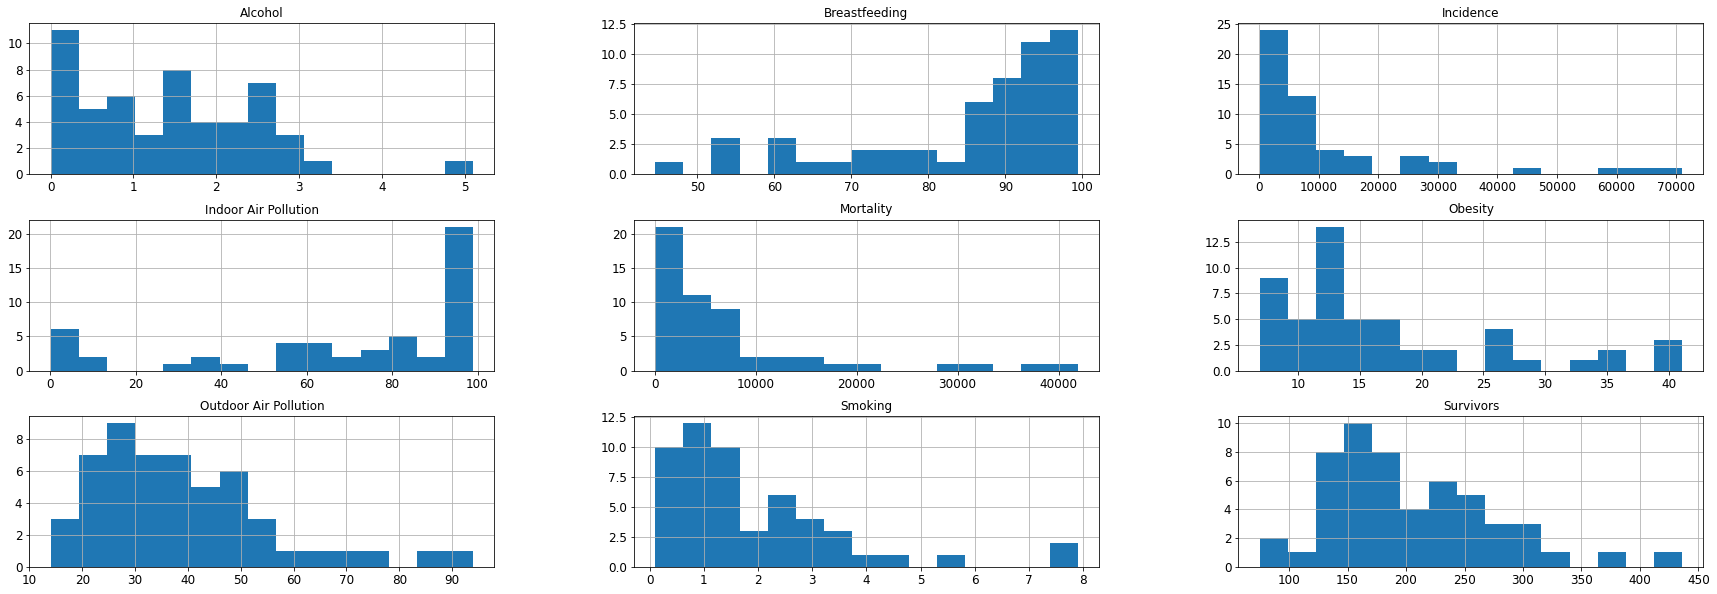

In [265]:
df.hist(bins = 15, figsize = (30, 10))

We now wish to save our data in a new excel file

In [266]:
pip install openpyxl

In [267]:
from openpyxl import Workbook, load_workbook
from openpyxl.drawing.image import Image
from openpyxl.utils.dataframe import dataframe_to_rows

In [268]:
book = Workbook()
sheet = book.active
book.save(r"C:\Users\DELL\African Women Cancer Full.xlsx")

In [269]:
sheet2 = book.create_sheet('sheet2', 0)
sheet = book['sheet2']
for x in dataframe_to_rows(df):
    sheet.append(x)
book.save(r"C:\Users\DELL\African Women Cancer Full.xlsx")

In [270]:
df = pd.read_excel(r"C:\Users\DELL\African Women Cancer Full.xlsx")
df = df.drop('Unnamed: 0', axis = 1)
df = df.drop(0, axis = 0)

In [271]:
df.head()

,Country,Mortality,Incidence,Alcohol,Smoking,Obesity,Breastfeeding,Outdoor Air Pollution,Indoor Air Pollution,Survivors
1,Algeria,13391.0,29112.0,0.2,2.2,34.9,55.1,39.0,0.32,312.6
2,Angola,5923.0,9218.0,2.4,1.6,12.1,92.6,32.0,56.00,190.2
3,Benin,2930.0,4297.0,1.1,1.0,14.2,85.6,39.0,90.00,198.1
4,Botswana,527.0,1076.0,2.1,3.5,29.3,44.5,23.0,46.00,236.7
5,Burkina Faso,5795.0,7516.0,2.4,3.5,8.1,97.2,43.0,95.00,158.1


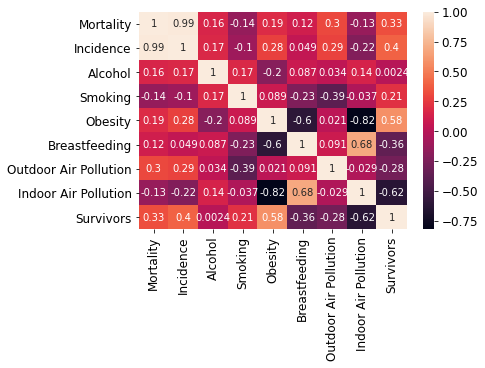

In [272]:
cancer_corr = df.corr()
sns.heatmap(cancer_corr, annot = True)

In [273]:
df.describe(include = [np.number])

,Mortality,Incidence,Alcohol,Smoking,Obesity,Breastfeeding,Outdoor Air Pollution,Indoor Air Pollution,Survivors
count,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000
mean,7097.471698,11451.207547,1.416981,1.877358,16.984906,84.877358,38.867925,68.669302,205.254717
std,9585.430975,16433.641109,1.043614,1.674083,9.012089,14.171320,16.937711,33.337220,70.739834
min,39.000000,65.000000,0.000000,0.100000,6.900000,44.500000,14.000000,0.083000,74.800000
25%,777.000000,1531.000000,0.600000,0.800000,11.100000,79.400000,26.000000,54.000000,155.700000
50%,4017.000000,5505.000000,1.400000,1.400000,13.500000,90.400000,36.000000,80.000000,192.200000
75%,8039.000000,11959.000000,2.300000,2.500000,20.300000,95.600000,46.000000,96.000000,247.700000
max,41913.000000,71022.000000,5.100000,7.900000,41.100000,99.400000,94.000000,99.000000,436.200000


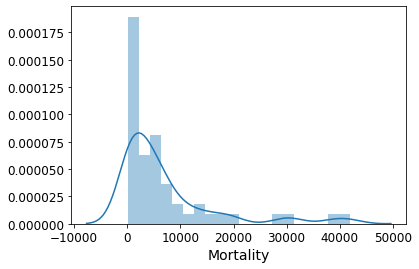

In [274]:
sns.distplot(df['Mortality'], bins = 20)

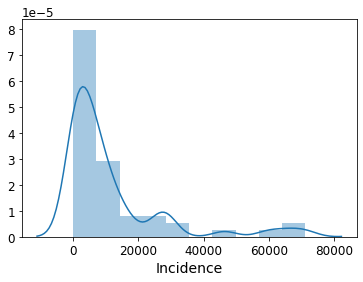

In [275]:
sns.distplot(df['Incidence'], bins = 10)

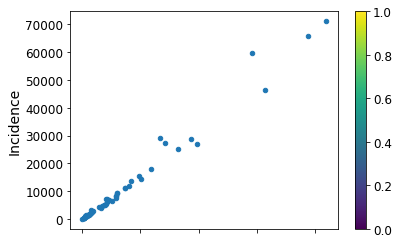

In [276]:
df.plot(kind = "scatter", x = "Mortality", y = "Incidence", alpha = 1.0, cmap = plt.get_cmap("jet"), colorbar = True)

In [277]:
df['MIR'] = df['Mortality'] / df['Incidence']

In [278]:
df.head(40)

,Country,Mortality,Incidence,Alcohol,Smoking,Obesity,Breastfeeding,Outdoor Air Pollution,Indoor Air Pollution,Survivors,MIR
1,Algeria,13391.0,29112.0,0.2,2.2,34.9,55.10,39.0,0.320,312.6,0.459982
2,Angola,5923.0,9218.0,2.4,1.6,12.1,92.60,32.0,56.000,190.2,0.642547
3,Benin,2930.0,4297.0,1.1,1.0,14.2,85.60,39.0,90.000,198.1,0.681871
4,Botswana,527.0,1076.0,2.1,3.5,29.3,44.50,23.0,46.000,236.7,0.489777
5,Burkina Faso,5795.0,7516.0,2.4,3.5,8.1,97.20,43.0,95.000,158.1,0.771022
6,Burundi,3803.0,4914.0,1.9,0.9,8.6,96.40,39.0,99.000,194.8,0.773911
7,Cabo Verde,217.0,300.0,2.5,2.6,16.3,83.10,35.0,39.000,254.2,0.723333
8,Cameroon,6028.0,9335.0,2.3,0.5,16.4,85.50,73.0,65.000,180.5,0.645742
9,Central African Republic,1226.0,1531.0,1.4,1.4,10.9,90.90,57.0,98.000,110.8,0.800784
10,Chad,3338.0,4572.0,1.6,1.9,8.9,90.40,66.0,96.000,128.9,0.730096


In [279]:
df.loc[38]

Country                   Nigeria
Mortality                   41913
Incidence                   71022
Alcohol                       5.1
Smoking                       0.8
Obesity                      13.1
Breastfeeding                88.7
Outdoor Air Pollution          72
Indoor Air Pollution           72
Survivors                   183.2
MIR                      0.590141
Name: 38, dtype: object

In [280]:
df.sort_values('MIR', ascending = 'False')

,Country,Mortality,Incidence,Alcohol,Smoking,Obesity,Breastfeeding,Outdoor Air Pollution,Indoor Air Pollution,Survivors,MIR
33,Mauritius,698.0,1616.0,1.6,1.5,15.70,73.95,14.0,2.500,367.6,0.431931
1,Algeria,13391.0,29112.0,0.2,2.2,34.90,55.10,39.0,0.320,312.6,0.459982
28,Libya,1488.0,3159.0,0.0,0.4,39.60,73.95,54.0,0.083,254.0,0.471035
45,South Africa,29235.0,59703.0,2.8,5.5,39.60,73.70,25.0,11.000,436.2,0.489674
4,Botswana,527.0,1076.0,2.1,3.5,29.30,44.50,23.0,46.000,236.7,0.489777
34,Morocco,14225.0,27495.0,0.2,0.8,32.20,66.00,33.0,1.500,288.9,0.517367
36,Namibia,606.0,1153.0,1.8,7.8,25.40,72.10,25.0,54.000,281.7,0.525585
50,Tunisia,4017.0,7348.0,0.2,3.0,34.30,53.70,38.0,0.270,256.1,0.546679
52,Zambia,4251.0,7227.0,0.8,2.5,12.40,94.70,27.0,85.000,266.9,0.588211
38,Nigeria,41913.0,71022.0,5.1,0.8,13.10,88.70,72.0,72.000,183.2,0.590141


In [282]:
df.corr()

,Mortality,Incidence,Alcohol,Smoking,Obesity,Breastfeeding,Outdoor Air Pollution,Indoor Air Pollution,Survivors,MIR
Mortality,1.000000,0.989432,0.159000,-0.143182,0.186766,0.116893,0.304510,-0.134826,0.326230,-0.204149
Incidence,0.989432,1.000000,0.168404,-0.102603,0.277134,0.049425,0.288649,-0.220884,0.395549,-0.283031
Alcohol,0.159000,0.168404,1.000000,0.167865,-0.201816,0.086718,0.034182,0.144319,0.002441,0.007129
Smoking,-0.143182,-0.102603,0.167865,1.000000,0.089464,-0.231405,-0.385535,-0.036635,0.214844,-0.143118
Obesity,0.186766,0.277134,-0.201816,0.089464,1.000000,-0.603839,0.020654,-0.820905,0.582261,-0.670917
Breastfeeding,0.116893,0.049425,0.086718,-0.231405,-0.603839,1.000000,0.091290,0.682641,-0.360829,0.562123
Outdoor Air Pollution,0.304510,0.288649,0.034182,-0.385535,0.020654,0.091290,1.000000,-0.029270,-0.281275,0.122660
Indoor Air Pollution,-0.134826,-0.220884,0.144319,-0.036635,-0.820905,0.682641,-0.029270,1.000000,-0.622231,0.795707
Survivors,0.326230,0.395549,0.002441,0.214844,0.582261,-0.360829,-0.281275,-0.622231,1.000000,-0.725781
MIR,-0.204149,-0.283031,0.007129,-0.143118,-0.670917,0.562123,0.122660,0.795707,-0.725781,1.000000


In [338]:
df_num = df.drop(columns = ['Country', 'MIR', 'Survivors'])

In [339]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
normalized_df = pd.DataFrame(scaler.fit_transform(df_num), columns = df_num.columns)

In [340]:
features_df = normalized_df.drop(columns = ['Mortality', 'Incidence'])
target_df = normalized_df['Incidence']

In [341]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(features_df, target_df, test_size = 0.2, random_state = 1)

In [342]:
from sklearn.linear_model import LinearRegression
linear = LinearRegression()
linear.fit(x_train, y_train)

LinearRegression()

In [343]:
print(linear.coef_)

[ 0.3114847  -0.03678854  0.35076387  0.34331071  0.25487138 -0.2754091 ]


In [344]:
coeff = pd.DataFrame(linear.coef_, features_df.columns, columns = ['Coefficient'])
print('The Coefficients of the predictor variables are: \n', coeff.round(3))

The Coefficients of the predictor variables are: 
                        Coefficient
Alcohol                      0.311
Smoking                     -0.037
Obesity                      0.351
Breastfeeding                0.343
Outdoor Air Pollution        0.255
Indoor Air Pollution        -0.275


In [345]:
print('The intercept of the regression line is: ', linear.intercept_.round(3))

The intercept of the regression line is:  0.035


In [346]:
predicted_values = linear.predict(x_test)

In [347]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
mae = mean_absolute_error(y_test, predicted_values).round(3)
rmse = np.sqrt(mean_squared_error(y_test, predicted_values)).round(3)
r2 = r2_score(y_test, predicted_values).round(3)
ssr = np.sum(np.square(y_test, predicted_values)).round(3)


In [348]:
reg_dict = {'Linear Reg': [mae, rmse, r2, ssr]}
reg_df = pd.DataFrame(reg_dict, index = ['mae', 'rmse', 'r2', 'ssr'])
reg_df

,Linear Reg
mae,0.515
rmse,0.614
r2,-3.097
ssr,2.247


In [ ]:
from sklearn.tree